In [17]:
data = read.table("toydata.csv", sep =",", header = TRUE)
#install.packages("ggplot2")
library(ggplot2)
library(MASS)
#install.packages("vegan")
library(vegan)

In [18]:
head(data)

X,s,x1,x2
1,0.0002388966,2.003374,1.501511
2,0.0004050434,2.041390,1.502756
3,0.0013808436,2.028269,1.509168
4,0.0014338985,2.026299,1.509484
5,0.0015705542,2.002584,1.509920
6,0.0022729661,2.029761,1.515136


In [19]:
x1 = data$x1
x2 = data$x2

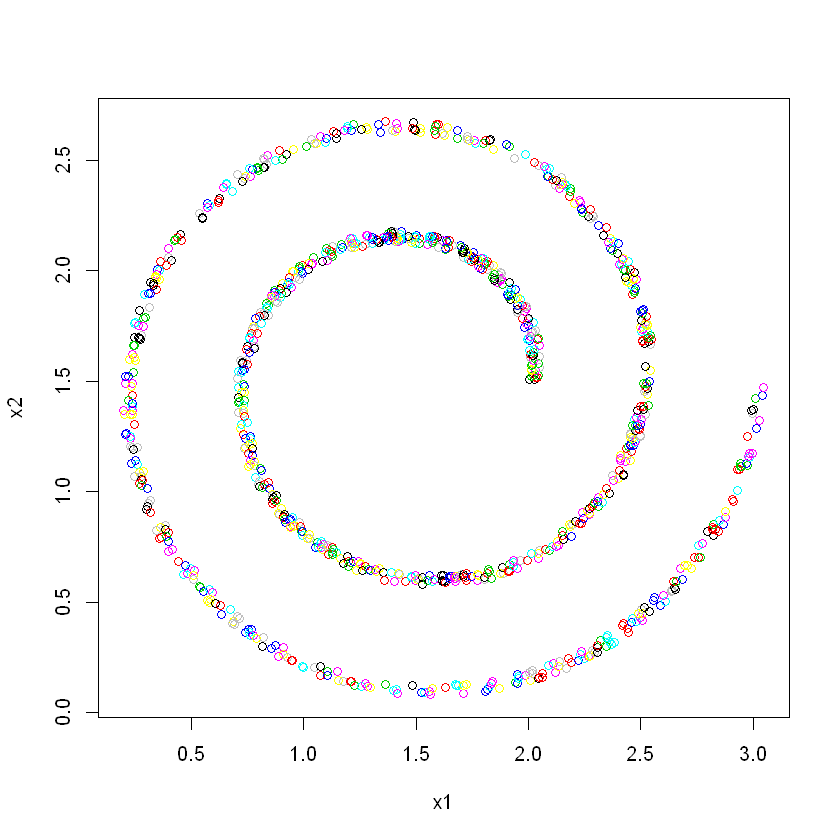

In [20]:
plot(x1, x2, col = data$s*1000)

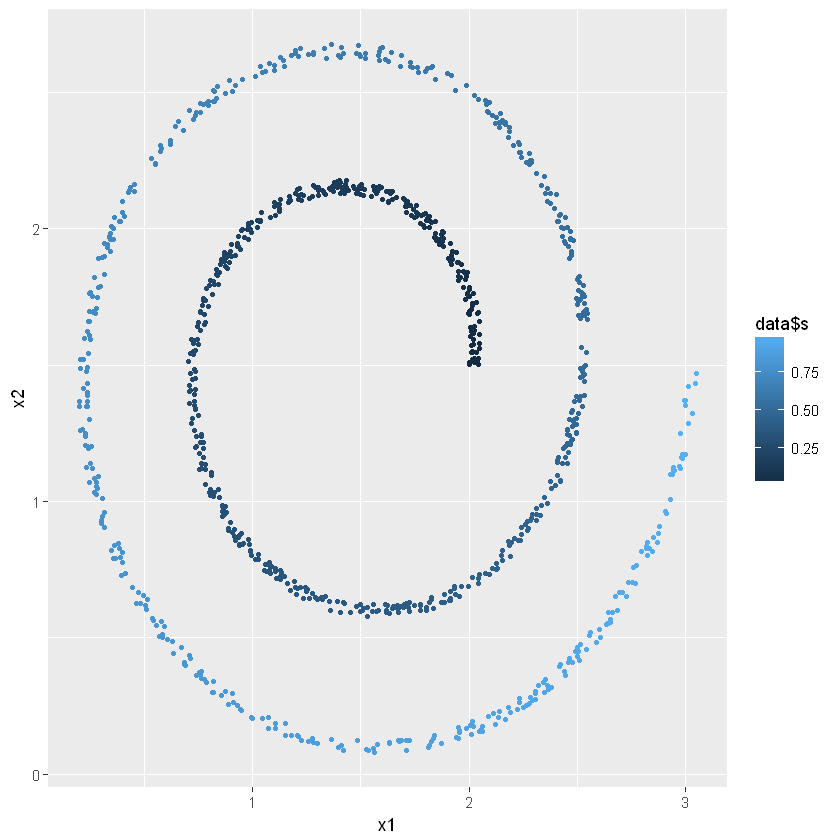

In [21]:
ggplot(data[,2:3], aes(x=x1 , y=x2, color=data$s)) + geom_point(size=1)

In [22]:
c_x1 = x1-mean(x1)
c_x2 = x2-mean(x2)
pca = princomp(cbind(c_x1, c_x2))
first = as.data.frame(cbind(pca$scores[,1], rep(0, length(pca$scores[,1]))))
head(first)

V1,V2
0.3107502,0
0.3396128,0
0.3253674,0
0.3236331,0
0.3048689,0
0.3227940,0


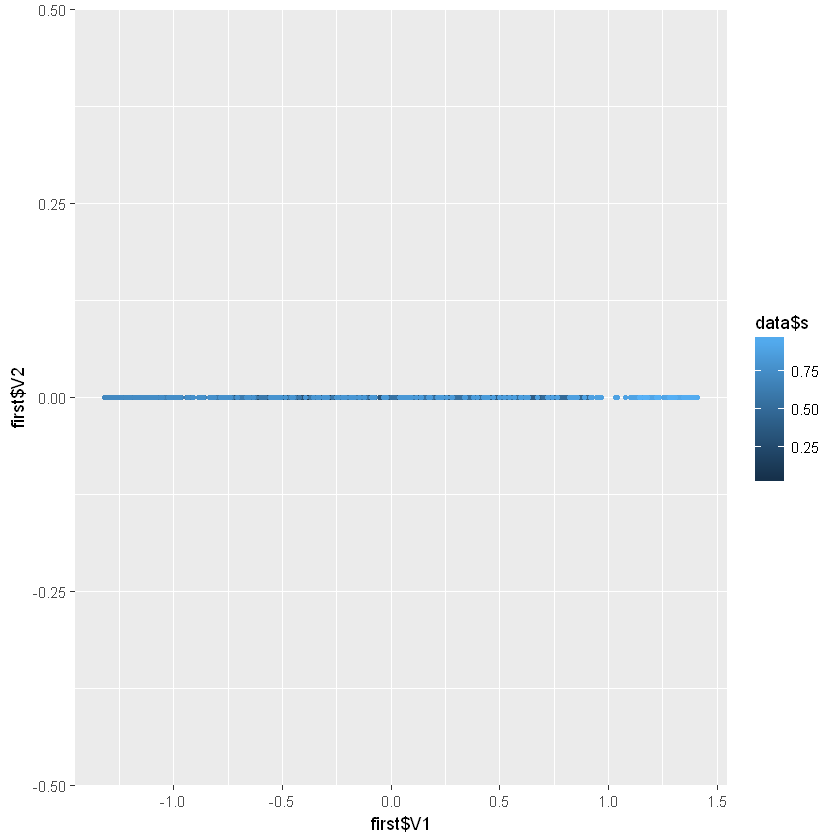

In [23]:
ggplot(first, aes(x = first$V1, y = first$V2, color=data$s)) + geom_point(size=1)

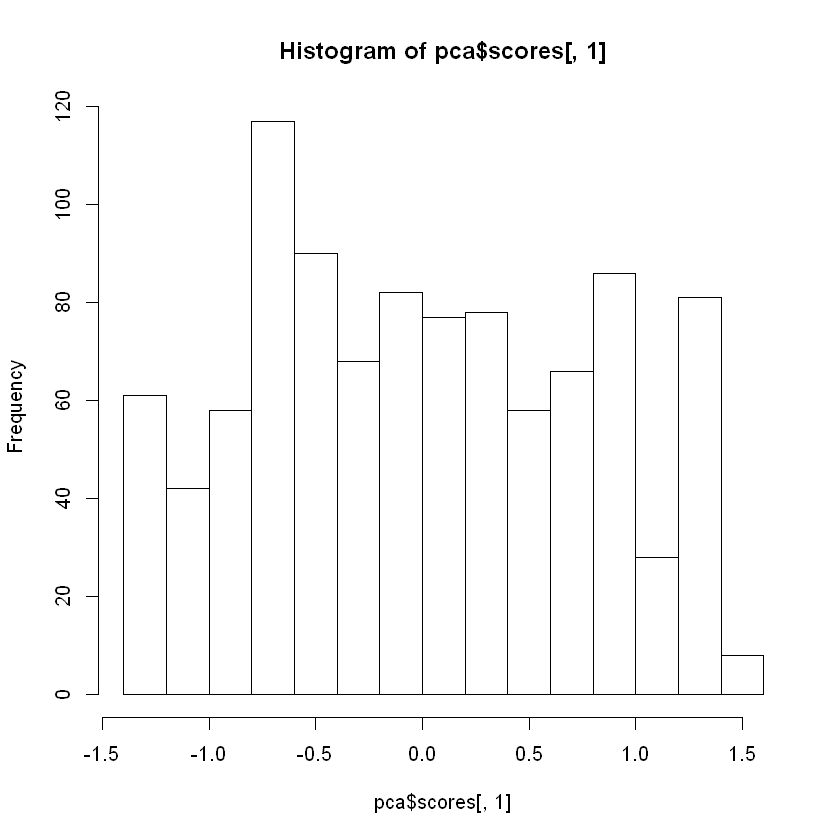

In [24]:
hist(pca$scores[,1])

In [33]:
d = dist(data[,2:3])
fit = sammon(d, k = 1)

Initial stress        : 0.04658
stress after  10 iters: 0.03674, magic = 0.500
stress after  20 iters: 0.03578, magic = 0.500
stress after  30 iters: 0.03568, magic = 0.500
stress after  40 iters: 0.03566, magic = 0.500


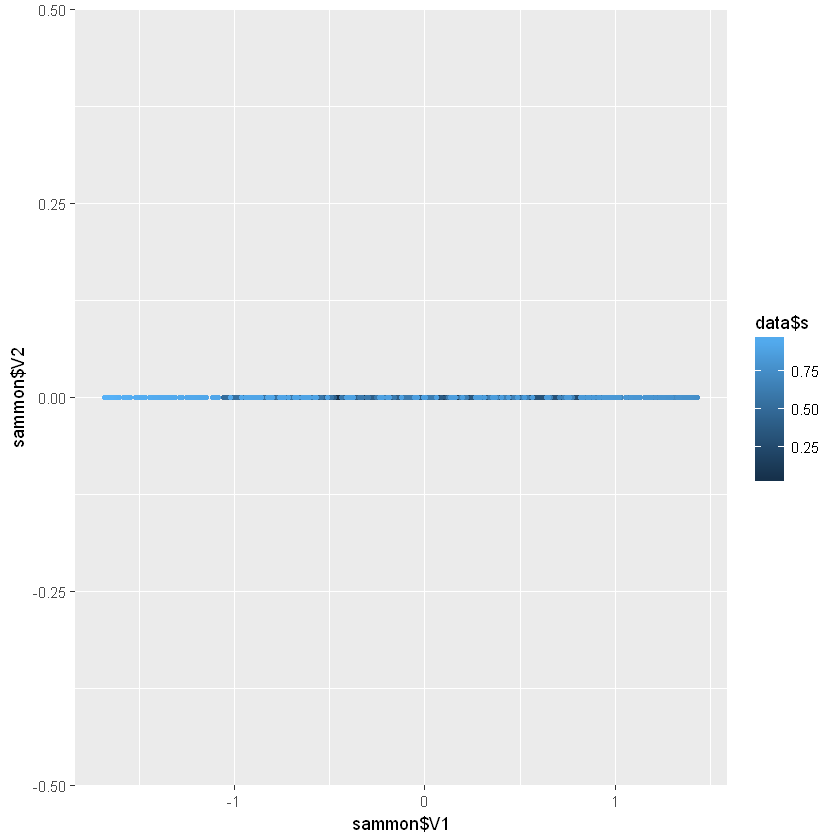

In [34]:
sammon = as.data.frame(cbind(fit$points[,1], rep(0, length(fit$points[,1]))))
ggplot(sammon, aes(x = sammon$V1, y = sammon$V2, color=data$s)) + geom_point(size=1)

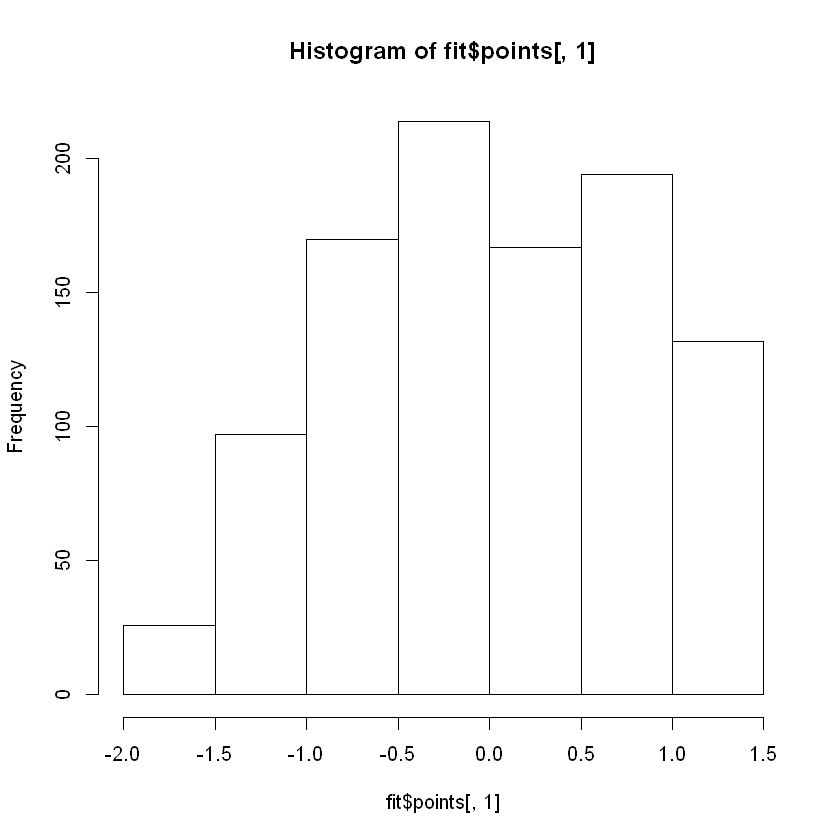

In [27]:
hist(fit$points[,1])

In [37]:
map = isomap(data[,2:3], ndim = 2, k = 2)

Warning message in as.dist.default(dist):
"non-square matrix"Warning message in df[row(df) > col(df)] <- x:
"number of items to replace is not a multiple of replacement length"

ERROR: Error in dimnames(df) <- if (is.null(labels)) list(seq_len(size), seq_len(size)) else list(labels, : length of 'dimnames' [1] not equal to array extent


In [24]:
wav2rgb <- function(wavelength, gamma=0.8){
##    Based on code by Dan Bruton
##    http://www.physics.sfasu.edu/astro/color/spectra.html
    if (wavelength >= 380 & wavelength <= 440) {
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ^ gamma
        G = 0.0
        B = (1.0 * attenuation) ^ gamma
        }
    else if (wavelength >= 440 & wavelength <= 490) {
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ^ gamma
        B = 1.0
        }
    else if (wavelength >= 490 & wavelength <= 510) {
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ^ gamma
        }
    else if (wavelength >= 510 & wavelength <= 580) {
        R = ((wavelength - 510) / (580 - 510)) ^ gamma
        G = 1.0
        B = 0.0
        }
    else if (wavelength >= 580 & wavelength <= 645) {
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ^ gamma
        B = 0.0
        }
    else if (wavelength >= 645 & wavelength <= 750) {
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ^ gamma
        G = 0.0
        B = 0.0
        }
    else {
        R = 0.0
        G = 0.0
        B = 0.0
        }
    R = R * 255
    G = G * 255
    B = B * 255
    return (rgb(floor(R), floor(G), floor(B), max=255))
}
colors <- function() {
  wl <- c(434,445,465,472,490,504,537,555,584,600,610,628,651,674)
  sim <- c(0.14,
           0.58,0.50,
           0.58,0.56,0.19,
           0.82,0.78,0.53,0.46,
           0.94,0.91,0.83,0.75,0.39,
           0.93,0.93,0.90,0.90,0.69,0.38,
           0.96,0.93,0.92,0.91,0.74,0.55,0.27,
           0.98,0.98,0.98,0.98,0.93,0.86,0.78,0.67,
           0.93,0.96,0.99,0.99,0.98,0.92,0.86,0.81,0.42,
           0.91,0.93,0.98,1.00,0.98,0.98,0.95,0.96,0.63,0.26,
           0.88,0.89,0.99,0.99,0.99,0.98,0.98,0.97,0.73,0.50,0.24,
           0.87,0.87,0.95,0.98,0.98,0.98,0.98,0.98,0.80,0.59,0.38,0.15,
           0.84,0.86,0.97,0.96,1.00,0.99,1.00,0.98,0.77,0.72,0.45,0.32,0.24)
  res <- matrix(0,length(wl),length(wl),dimnames=list(wl,wl))
  res[upper.tri(res)] <- sim
  res <- t(res)
  res[upper.tri(res)] <- sim
  list(d=as.dist(res),col=sapply(wl,wav2rgb),labels=as.character(wl))
}
aux <- colors()
plot1d <- function(x,col=aux$col,labels=aux$labels,main="k = 1") {
  plot(c(min(x),max(x)+0.05),c(1,length(x)),type="n",bty="n",xlab="x",ylab="index",main=main)
  abline(v=x,col=aux$col)
  lines(x,1:length(x),col="gray")
  points(x,1:length(x),pch=19,col=aux$col)
  text(x,1:length(x),labels=aux$labels,pos=4,cex=0.5)
}
plot2d <- function(xy,col=aux$col,labels=aux$labels,main="k = 2") {
  plot(c(min(xy[,1]),max(xy[,1])+0.05),range(xy[,2]),type="n",bty="n",xlab="x",ylab="y",main=main)
  lines(xy,col="gray")
  points(xy,pch=19,col=aux$col)
}

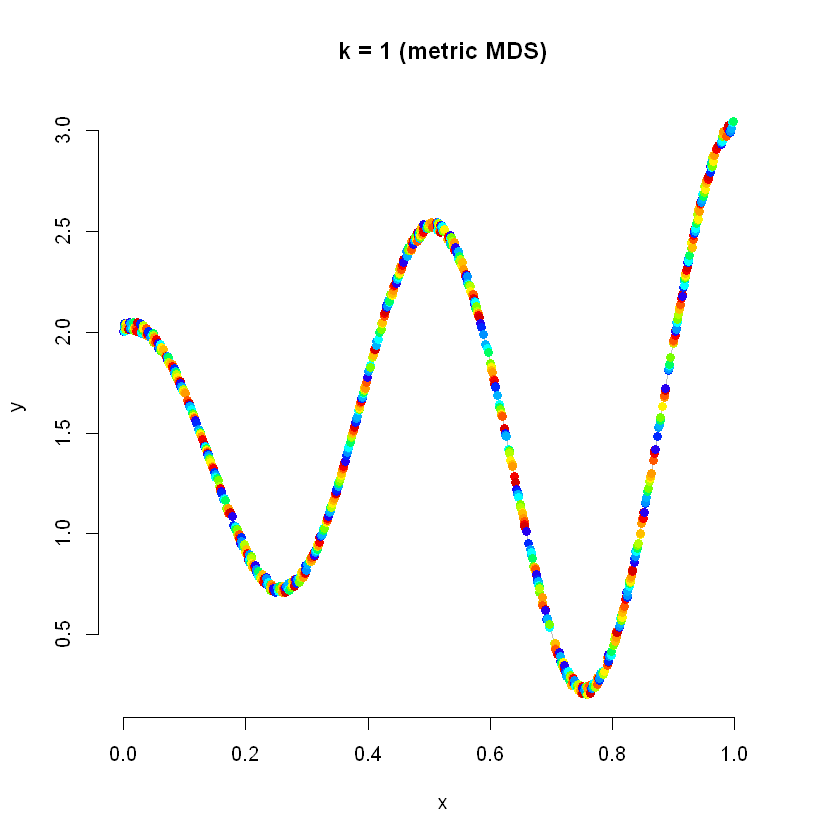

In [25]:
plot2d(data[,2:3],main="k = 1 (metric MDS)")